<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.2 - Exploratory data analysis (Continue)
</div>

# Import

In [1]:
# import ast

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read processed data

In [2]:
df_videos = pd.read_csv('../data/processed/df_videos_processed.csv')
# df_comments = pd.read_csv('../data/processed/df_comments_processed.csv', lineterminator = '\n')

# Convert to approriate data types

In [3]:
df_videos['published'] =  df_videos['published'].apply(pd.to_datetime)
df_videos['duration'] = df_videos['duration'].apply(pd.to_timedelta)
# df_videos['tags'] = df_videos['tags'].apply(lambda x: np.sort(np.unique(ast.literal_eval(x))) if pd.notnull(x) else np.nan)
# df_videos['playlist_published'] = df_videos['playlist_published'].apply(pd.to_datetime)

# df_comments['published_at'] =  df_comments['published_at'].apply(pd.to_datetime)
# df_comments['updatedat'] =  df_comments['updatedat'].apply(pd.to_datetime)

# Questions

## Are there any seasonal trends of views during certain times of the year?
Understanding seasonal trends in views can help us pinpoint times of the year when the audience is most active.

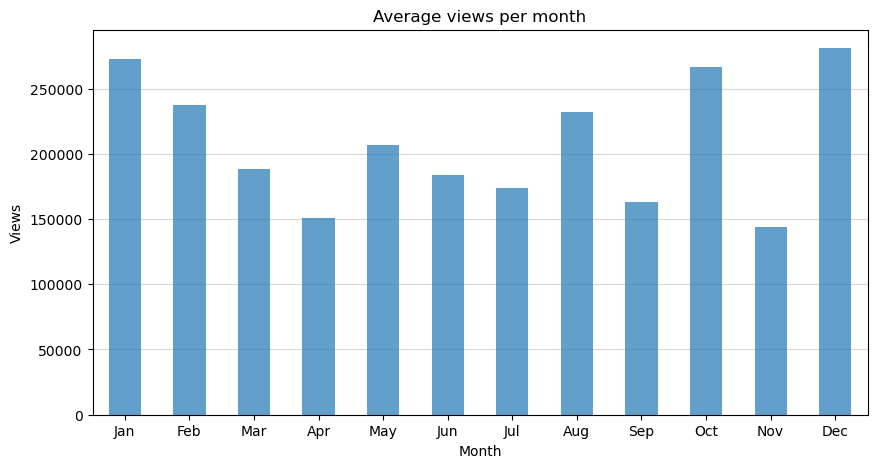

In [4]:
df_trends = df_videos[['published', 'view_count']].copy()
df_trends['month'] = df_trends['published'].dt.month
monthly_uploads = df_trends.groupby('month').mean(numeric_only = True)

fig, ax = plt.subplots(figsize=(10, 5))

monthly_uploads.plot(kind = 'bar', alpha = 0.7, ax = ax)
ax.set_title('Average views per month')
ax.set_xlabel('Month')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 0)
ax.set_axisbelow(True)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.5)
ax.set_ylabel('Views')
ax.get_legend().remove()

In [5]:
# fig = plt.figure(figsize = (25, 20))

# for year in range(2014 + 1, 2023 + 1):
#     df_trends = df_videos[['published', 'view_count']]
#     df_trends = df_trends[df_trends['published'].dt.year == year]
#     df_trends['month'] = df_trends['published'].dt.month
#     monthly_uploads = df_trends.groupby('month').mean(numeric_only = True)

#     ax = fig.add_subplot(3, 3, year - 2014)
#     monthly_uploads.plot(kind = 'bar', ax = ax)
#     ax.set_title(f'Average views per month in {year}')
#     ax.set_xlabel('Month')
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
#     ax.set_axisbelow(True)
#     ax.grid(axis = 'y', linestyle = '-', alpha = 0.5)
#     ax.set_ylabel('Views')
#     ax.get_legend().remove()

# plt.tight_layout();

## Do viewing habits for videos differ across the days of the week?
Understanding which days consistently garner higher views can guide us on the best day to schedule video uploads.

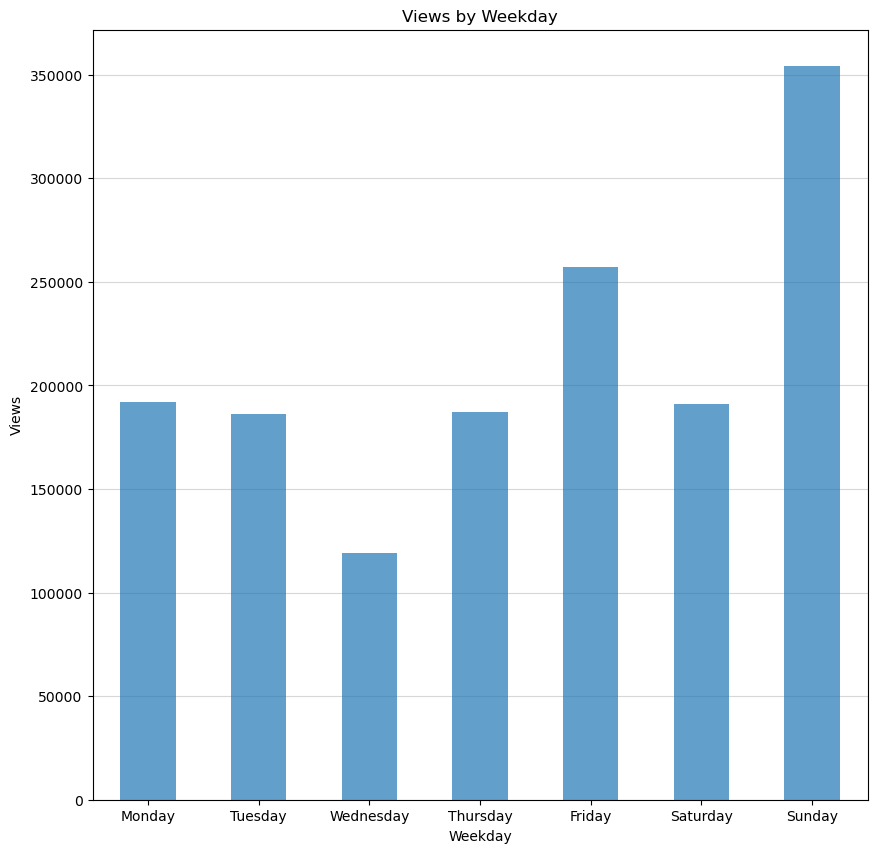

In [6]:
df_trends = df_videos[['published', 'view_count']].copy()
df_trends['weekday'] = df_trends['published'].dt.weekday
weekday_views = df_trends.groupby('weekday').mean(numeric_only = True)

fig, ax = plt.subplots(figsize = (10, 10))

weekday_views.plot(kind = 'bar', alpha = 0.7, ax = ax)
ax.set_title('Views by Weekday')
ax.set_xlabel('Weekday')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 0)
ax.set_axisbelow(True)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.5)
ax.set_ylabel('Views')
ax.get_legend().remove()

## Are there any trends in video length? 
Knowing if video lengths are getting longer, shorter, or staying steady helps ua tailor our content to current preferences.

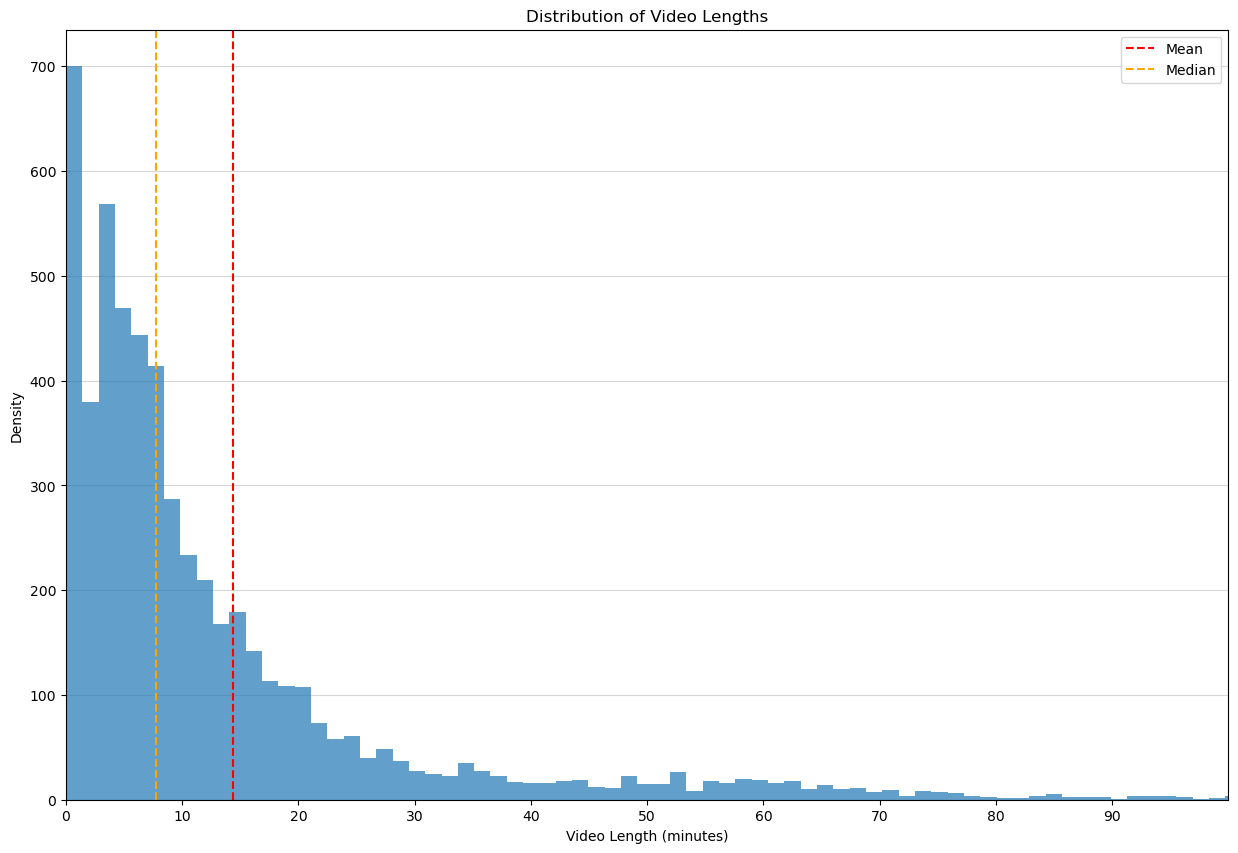

In [10]:
seri_duration = df_videos['duration'].dt.total_seconds() / 60

fig, ax = plt.subplots(figsize = (15, 10))

seri_duration.plot(kind = 'hist', bins = 'fd', label = '_', alpha = 0.7, ax = ax)
ax.set_title('Distribution of Video Lengths')
ax.set_xlabel('Video Length (minutes)')
ax.set_xlim(0, 100)
ax.set_xticks(np.arange(0, 100, 10))
ax.set_ylabel('Density')
ax.set_axisbelow(True)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.5)

ax.axvline(seri_duration.mean(), color = 'red', linestyle = '--', label = 'Mean')
ax.axvline(seri_duration.median(), color = 'orange', linestyle = '--', label = 'Median')

ax.legend();